### opencv と python による機械学習
- p260
- kmeaans

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [2]:
import cv2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

In [3]:
import numpy as np
digits.data = digits.data.astype(np.float32)
compactnesss, clusters, centers = cv2.kmeans(digits.data, 10, None, criteria, 10, flags)

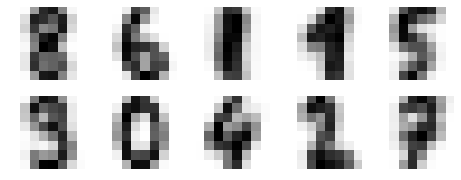

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = centers.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [5]:
from scipy.stats import mode
labels = np.zeros_like(clusters.ravel())
for i in range(10):
    mask = (clusters.ravel() == i)
    labels[mask] = mode(digits.target[mask])[0]

/var/folders/np/chqdmqld4h98fpysyglct_4m0000gp/T/ipykernel_15709/946721536.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)


0.7846410684474123

### 階層的クラスタリング

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=100, n_samples=10)

In [8]:
from sklearn import cluster
agg = cluster.AgglomerativeClustering(n_clusters=3)

In [9]:
labels = agg.fit_predict(X)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


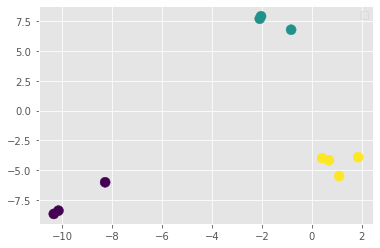

In [10]:
plt.style.use('ggplot')
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100)